<a href="https://colab.research.google.com/github/cabbi120101/TIL/blob/master/%EA%B3%B5%EB%AA%A8%EC%A0%84%EA%B3%B5%EB%B6%80/%EC%8B%9C%EA%B0%81%ED%99%94%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EB%8C%80%EC%A4%91%EA%B5%90%ED%86%B5(%EB%B2%84%EC%8A%A4%EC%A0%95%EB%A5%98%EC%9E%A5_%EA%B7%B8%EB%9E%98%ED%94%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import re
import datetime 

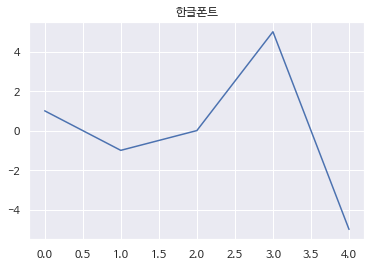

In [3]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# "Malgun Gothic"
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 한글폰트 설정 확인을 합니다.

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

In [4]:
#전체 승객
data_file = '/content/drive/MyDrive/Colab Notebooks/코로나관련/대중교통관련/버스/bus_all_all.csv'
df = pd.read_csv(data_file)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,3시하차총승객수,4시승차총승객수,4시하차총승객수,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,9시하차총승객수,10시승차총승객수,10시하차총승객수,11시승차총승객수,11시하차총승객수,12시승차총승객수,12시하차총승객수,13시승차총승객수,13시하차총승객수,14시승차총승객수,14시하차총승객수,15시승차총승객수,15시하차총승객수,16시승차총승객수,16시하차총승객수,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,노선ID
0,202104,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리,0,3,59,182,26,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20210503,NaN
1,202104,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리,26,79,0,0,0,0,0,0,0,0,0,0,250,81,716,224,783,440,580,432,380,358,303,317,337,356,364,419,286,350,296,380,225,344,398,427,367,449,314,336,307,125,322,121,273,177,131,69,20210503,NaN
2,202104,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리,0,0,0,0,12,30,110,212,17,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20210503,NaN
3,202104,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리,79,99,16,87,0,0,0,0,0,0,0,0,148,60,560,218,485,375,444,429,231,287,220,328,260,328,263,311,235,303,367,280,249,374,381,491,461,517,291,340,294,143,295,139,290,179,133,60,20210503,NaN
4,202104,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원,0,0,0,0,0,0,0,0,142,147,140,203,38,197,205,436,345,745,224,379,138,265,119,214,85,206,71,241,118,244,131,116,160,77,192,60,135,35,68,24,68,19,27,34,25,36,14,9,20210503,NaN


In [5]:
# 역별 구 구분 자료, 표준버스정류장ID컬럼으로 변경
data_file = '/content/drive/MyDrive/Colab Notebooks/코로나관련/대중교통관련/버스/bus stops address and gu_3.csv'
df2 = pd.read_csv(data_file, encoding='cp949')
df2.rename(columns={'StandardID':'표준버스정류장ID'}, inplace=True)
df2.head()


,Unnamed: 0,표준버스정류장ID,ARS-ID,Busstop,x,y,ADDR,구,주소,소속구
0,0,100000001,1001,종로2가사거리,126.987786,37.569764,NaN,대한민국 서울특별시 종로구 종로2가,대한민국 서울특별시 종로1.2.3.4가동 종로2가사거리,종로구
1,1,100000002,1002,창경궁.서울대학교병원,126.996520,37.579179,NaN,대한민국 서울특별시 종로구 와룡동,대한민국 서울특별시 와룡동 창경궁,종로구
2,2,100000003,1003,명륜3가.성대입구,126.998290,37.582709,NaN,대한민국 서울특별시 종로구 와룡동,대한민국 서울특별시 종로구 명륜4가 195-17,종로구
3,3,100000004,1004,종로2가.삼일교,126.987507,37.568582,NaN,대한민국 서울특별시 종로구 와룡동,대한민국 서울특별시 종로구 관철동 238,종로구
4,4,100000005,1005,혜화동로터리.여운형활동터,127.001694,37.586230,NaN,대한민국 서울특별시 종로구 와룡동,대한민국 서울특별시 종로구 혜화동 85-10,종로구


In [6]:
# 표준버스정류장ID 기준으로 merge
big_df = pd.merge(df, df2, how="left", on="표준버스정류장ID")
big_df

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,3시하차총승객수,4시승차총승객수,4시하차총승객수,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,9시하차총승객수,10시승차총승객수,10시하차총승객수,11시승차총승객수,11시하차총승객수,12시승차총승객수,12시하차총승객수,13시승차총승객수,13시하차총승객수,14시승차총승객수,14시하차총승객수,15시승차총승객수,15시하차총승객수,16시승차총승객수,16시하차총승객수,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,노선ID,Unnamed: 0,ARS-ID,Busstop,x,y,ADDR,구,주소,소속구
0,202104,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리,0,3,59,182,26,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20210503,NaN,0.0,1001.0,종로2가사거리,126.987786,37.569764,NaN,대한민국 서울특별시 종로구 종로2가,대한민국 서울특별시 종로1.2.3.4가동 종로2가사거리,종로구
1,202104,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리,26,79,0,0,0,0,0,0,0,0,0,0,250,81,716,224,783,440,580,432,380,358,303,317,337,356,364,419,286,350,296,380,225,344,398,427,367,449,314,336,307,125,322,121,273,177,131,69,20210503,NaN,0.0,1001.0,종로2가사거리,126.987786,37.569764,NaN,대한민국 서울특별시 종로구 종로2가,대한민국 서울특별시 종로1.2.3.4가동 종로2가사거리,종로구
2,202104,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리,0,0,0,0,12,30,110,212,17,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20210503,NaN,0.0,1001.0,종로2가사거리,126.987786,37.569764,NaN,대한민국 서울특별시 종로구 종로2가,대한민국 서울특별시 종로1.2.3.4가동 종로2가사거리,종로구
3,202104,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리,79,99,16,87,0,0,0,0,0,0,0,0,148,60,560,218,485,375,444,429,231,287,220,328,260,328,263,311,235,303,367,280,249,374,381,491,461,517,291,340,294,143,295,139,290,179,133,60,20210503,NaN,0.0,1001.0,종로2가사거리,126.987786,37.569764,NaN,대한민국 서울특별시 종로구 종로2가,대한민국 서울특별시 종로1.2.3.4가동 종로2가사거리,종로구
4,202104,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원,0,0,0,0,0,0,0,0,142,147,140,203,38,197,205,436,345,745,224,379,138,265,119,214,85,206,71,241,118,244,131,116,160,77,192,60,135,35,68,24,68,19,27,34,25,36,14,9,20210503,NaN,1.0,1002.0,창경궁.서울대학교병원,126.996520,37.579179,NaN,대한민국 서울특별시 종로구 와룡동,대한민국 서울특별시 와룡동 창경궁,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168427,202012,9714,9714번(교하운정~서울역),229000856,63658,우리은행앞,1,24,0,24,0,40,5,19,0,0,0,0,0,0,0,105,1,120,0,38,1,21,2,18,2,36,0,91,0,36,1,62,0,111,1,84,0,124,3,239,2,112,2,140,4,70,1,53,20210103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168428,202012,9714,9714번(교하운정~서울역),229000857,63660,중앙공원,0,8,0,7,0,10,0,10,0,0,0,0,0,0,0,23,4,21,0,6,0,9,0,11,0,14,0,20,0,12,0,23,1,43,0,26,0,31,0,54,0,38,0,30,0,23,0,16,20210103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168429,202012,9714,9714번(교하운정~서울역),229000858,63675,책향기마을,0,22,0,17,0,26,0,14,0,0,0,0,0,0,0,23,1,71,0,7,0,23,0,19,0,29,0,32,0,29,0,37,0,64,1,65,1,91,0,143,0,67,0,121,0,102,0,46,20210103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168430,202012,9714,9714번(교하운정~서울역),229001662,63736,교하차고지,0,0,3,0,0,0,0,0,0,0,0,0,22,0,19,0,10,1,1,1,0,0,2,0,5,0,3,0,2,0,4,0,1,0,3,0,11,1,8,1,2,0,0,0,1,0,5,0,20210103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 소속구 null 갯수 확인
big_df[big_df['소속구'].isnull()]

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,3시하차총승객수,4시승차총승객수,4시하차총승객수,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,9시하차총승객수,10시승차총승객수,10시하차총승객수,11시승차총승객수,11시하차총승객수,12시승차총승객수,12시하차총승객수,13시승차총승객수,13시하차총승객수,14시승차총승객수,14시하차총승객수,15시승차총승객수,15시하차총승객수,16시승차총승객수,16시하차총승객수,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,노선ID,Unnamed: 0,ARS-ID,Busstop,x,y,ADDR,구,주소,소속구
2407,202104,N15,N15번(사당역~우이동),101000329,2099,숭례문(가상),0,0,0,0,0,0,44,27,29,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20210503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2408,202104,506,506번(신림동~종로1가),101000329,2099,숭례문(가상),0,0,0,0,0,0,0,0,0,0,20,1,42,0,126,7,185,17,145,14,132,20,108,27,156,50,146,36,213,39,285,66,368,50,452,95,434,129,384,36,297,44,305,32,332,23,204,14,20210503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2409,202104,603,603번(신월동~시청),101000329,2099,숭례문(가상),8,5,0,0,0,0,0,0,0,0,16,4,14,15,51,28,43,64,47,50,46,39,40,43,45,56,72,47,79,41,92,56,84,48,90,58,153,81,89,39,48,32,55,51,68,58,27,26,20210503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2410,202104,702B,"702번(B,용두초교방향,서오릉~종로1가)",101000329,2099,숭례문(가상),0,0,0,0,0,0,0,0,14,20,261,52,108,36,344,44,906,122,317,60,169,53,184,56,195,39,274,44,338,58,424,42,468,63,596,61,648,68,628,42,514,52,593,29,533,23,166,12,20210503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2411,202104,N15,N15번(우이동~사당역),101000329,2099,숭례문(가상),5,1,200,46,66,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20210503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168427,202012,9714,9714번(교하운정~서울역),229000856,63658,우리은행앞,1,24,0,24,0,40,5,19,0,0,0,0,0,0,0,105,1,120,0,38,1,21,2,18,2,36,0,91,0,36,1,62,0,111,1,84,0,124,3,239,2,112,2,140,4,70,1,53,20210103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168428,202012,9714,9714번(교하운정~서울역),229000857,63660,중앙공원,0,8,0,7,0,10,0,10,0,0,0,0,0,0,0,23,4,21,0,6,0,9,0,11,0,14,0,20,0,12,0,23,1,43,0,26,0,31,0,54,0,38,0,30,0,23,0,16,20210103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168429,202012,9714,9714번(교하운정~서울역),229000858,63675,책향기마을,0,22,0,17,0,26,0,14,0,0,0,0,0,0,0,23,1,71,0,7,0,23,0,19,0,29,0,32,0,29,0,37,0,64,1,65,1,91,0,143,0,67,0,121,0,102,0,46,20210103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168430,202012,9714,9714번(교하운정~서울역),229001662,63736,교하차고지,0,0,3,0,0,0,0,0,0,0,0,0,22,0,19,0,10,1,1,1,0,0,2,0,5,0,3,0,2,0,4,0,1,0,3,0,11,1,8,1,2,0,0,0,1,0,5,0,20210103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
big_df['소속구'].isnull().sum()

140315

In [9]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168432 entries, 0 to 1168431
Data columns (total 65 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   사용년월        1168432 non-null  int64  
 1   노선번호        1168432 non-null  object 
 2   노선명         1168432 non-null  object 
 3   표준버스정류장ID   1168432 non-null  object 
 4   버스정류장ARS번호  1168432 non-null  object 
 5   역명          1168432 non-null  object 
 6   00시승차총승객수   1168432 non-null  int64  
 7   00시하차총승객수   1168432 non-null  int64  
 8   1시승차총승객수    1168432 non-null  int64  
 9   1시하차총승객수    1168432 non-null  int64  
 10  2시승차총승객수    1168432 non-null  int64  
 11  2시하차총승객수    1168432 non-null  int64  
 12  3시승차총승객수    1168432 non-null  int64  
 13  3시하차총승객수    1168432 non-null  int64  
 14  4시승차총승객수    1168432 non-null  int64  
 15  4시하차총승객수    1168432 non-null  int64  
 16  5시승차총승객수    1168432 non-null  int64  
 17  5시하차총승객수    1168432 non-null  int64  
 18  6시승차총승객수    1168432 no

In [10]:
# 소속구에 null이 아닌 값만 남긴다.
big_df=big_df[big_df['소속구'].notnull()]
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028117 entries, 0 to 1168397
Data columns (total 65 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   사용년월        1028117 non-null  int64  
 1   노선번호        1028117 non-null  object 
 2   노선명         1028117 non-null  object 
 3   표준버스정류장ID   1028117 non-null  object 
 4   버스정류장ARS번호  1028117 non-null  object 
 5   역명          1028117 non-null  object 
 6   00시승차총승객수   1028117 non-null  int64  
 7   00시하차총승객수   1028117 non-null  int64  
 8   1시승차총승객수    1028117 non-null  int64  
 9   1시하차총승객수    1028117 non-null  int64  
 10  2시승차총승객수    1028117 non-null  int64  
 11  2시하차총승객수    1028117 non-null  int64  
 12  3시승차총승객수    1028117 non-null  int64  
 13  3시하차총승객수    1028117 non-null  int64  
 14  4시승차총승객수    1028117 non-null  int64  
 15  4시하차총승객수    1028117 non-null  int64  
 16  5시승차총승객수    1028117 non-null  int64  
 17  5시하차총승객수    1028117 non-null  int64  
 18  6시승차총승객수    1028117 no

In [11]:
# 총승차승객수 구
big_df['총승차승객수'] = big_df['00시승차총승객수']+big_df['1시승차총승객수']+big_df['2시승차총승객수']+big_df['3시승차총승객수']+big_df['4시승차총승객수']+big_df['5시승차총승객수']+big_df['6시승차총승객수']+big_df['7시승차총승객수']+big_df['8시승차총승객수']+big_df['9시승차총승객수']+big_df['10시승차총승객수']+big_df['11시승차총승객수']+big_df['12시승차총승객수']+big_df['13시승차총승객수']+big_df['14시승차총승객수']+big_df['15시승차총승객수']+big_df['16시승차총승객수']+big_df['17시승차총승객수']+big_df['18시승차총승객수']+big_df['19시승차총승객수']+big_df['20시승차총승객수']+big_df['21시승차총승객수']+big_df['22시승차총승객수']+big_df['23시승차총승객수']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# 총승차승객수 잘 생겼나 확인
big_df.head()

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,3시하차총승객수,4시승차총승객수,4시하차총승객수,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,9시하차총승객수,10시승차총승객수,10시하차총승객수,11시승차총승객수,11시하차총승객수,12시승차총승객수,12시하차총승객수,13시승차총승객수,13시하차총승객수,14시승차총승객수,14시하차총승객수,15시승차총승객수,15시하차총승객수,16시승차총승객수,16시하차총승객수,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,노선ID,Unnamed: 0,ARS-ID,Busstop,x,y,ADDR,구,주소,소속구,총승차승객수
0,202104,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리,0,3,59,182,26,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20210503,NaN,0.0,1001.0,종로2가사거리,126.987786,37.569764,NaN,대한민국 서울특별시 종로구 종로2가,대한민국 서울특별시 종로1.2.3.4가동 종로2가사거리,종로구,85
1,202104,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리,26,79,0,0,0,0,0,0,0,0,0,0,250,81,716,224,783,440,580,432,380,358,303,317,337,356,364,419,286,350,296,380,225,344,398,427,367,449,314,336,307,125,322,121,273,177,131,69,20210503,NaN,0.0,1001.0,종로2가사거리,126.987786,37.569764,NaN,대한민국 서울특별시 종로구 종로2가,대한민국 서울특별시 종로1.2.3.4가동 종로2가사거리,종로구,6658
2,202104,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리,0,0,0,0,12,30,110,212,17,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20210503,NaN,0.0,1001.0,종로2가사거리,126.987786,37.569764,NaN,대한민국 서울특별시 종로구 종로2가,대한민국 서울특별시 종로1.2.3.4가동 종로2가사거리,종로구,139
3,202104,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리,79,99,16,87,0,0,0,0,0,0,0,0,148,60,560,218,485,375,444,429,231,287,220,328,260,328,263,311,235,303,367,280,249,374,381,491,461,517,291,340,294,143,295,139,290,179,133,60,20210503,NaN,0.0,1001.0,종로2가사거리,126.987786,37.569764,NaN,대한민국 서울특별시 종로구 종로2가,대한민국 서울특별시 종로1.2.3.4가동 종로2가사거리,종로구,5702
4,202104,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원,0,0,0,0,0,0,0,0,142,147,140,203,38,197,205,436,345,745,224,379,138,265,119,214,85,206,71,241,118,244,131,116,160,77,192,60,135,35,68,24,68,19,27,34,25,36,14,9,20210503,NaN,1.0,1002.0,창경궁.서울대학교병원,126.996520,37.579179,NaN,대한민국 서울특별시 종로구 와룡동,대한민국 서울특별시 와룡동 창경궁,종로구,2445


In [13]:
big_df.columns

Index(['사용년월', '노선번호', '노선명', '표준버스정류장ID', '버스정류장ARS번호', '역명', '00시승차총승객수',
       '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수',
       '3시하차총승객수', '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '6시승차총승객수',
       '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수',
       '9시하차총승객수', '10시승차총승객수', '10시하차총승객수', '11시승차총승객수', '11시하차총승객수',
       '12시승차총승객수', '12시하차총승객수', '13시승차총승객수', '13시하차총승객수', '14시승차총승객수',
       '14시하차총승객수', '15시승차총승객수', '15시하차총승객수', '16시승차총승객수', '16시하차총승객수',
       '17시승차총승객수', '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수',
       '19시하차총승객수', '20시승차총승객수', '20시하차총승객수', '21시승차총승객수', '21시하차총승객수',
       '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수', '등록일자', '노선ID',
       'Unnamed: 0', 'ARS-ID', 'Busstop', 'x', 'y', 'ADDR', '구', '주소', '소속구',
       '총승차승객수'],
      dtype='object')

In [14]:
# 필요한 컬럼만 남김
big_df=big_df.drop( ['노선번호', '노선명', '표준버스정류장ID', '버스정류장ARS번호', '역명', '00시승차총승객수',
       '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수',
       '3시하차총승객수', '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '6시승차총승객수',
       '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수',
       '9시하차총승객수', '10시승차총승객수', '10시하차총승객수', '11시승차총승객수', '11시하차총승객수',
       '12시승차총승객수', '12시하차총승객수', '13시승차총승객수', '13시하차총승객수', '14시승차총승객수',
       '14시하차총승객수', '15시승차총승객수', '15시하차총승객수', '16시승차총승객수', '16시하차총승객수',
       '17시승차총승객수', '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수',
       '19시하차총승객수', '20시승차총승객수', '20시하차총승객수', '21시승차총승객수', '21시하차총승객수',
       '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수', '등록일자', '노선ID',
       'Unnamed: 0', 'ARS-ID', 'Busstop', 'x', 'y', 'ADDR', '구', '주소'], axis=1)

In [15]:
# 사용년월 기준으로 정렬
big_df = big_df.sort_values('사용년월')
big_df.head()

,사용년월,소속구,총승차승객수
257760,201901,서대문구,1339
257306,201901,마포구,116
257307,201901,마포구,393
257308,201901,마포구,139
257309,201901,마포구,566


In [16]:
# 인간은 실수를 반복한다.
# 아래 코드를 실행시키니 타입 에러 나서 사용일자 타입을 바꿔줌
big_df['사용년월'] = big_df['사용년월'].astype(str)
# big_df['연도'] = big_df['사용일자'].str[0:3]
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028117 entries, 257760 to 78058
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   사용년월    1028117 non-null  object
 1   소속구     1028117 non-null  object
 2   총승차승객수  1028117 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 31.4+ MB


In [17]:
# 사용일자 형식을 YYYYMM에서 YYYY-MM으로 바
from datetime import datetime

big_df['사용년월'] = [datetime.strptime(x, '%Y%m').strftime('%Y-%m') for x in big_df.사용년월]
big_df.head()

,사용년월,소속구,총승차승객수
257760,2019-01,서대문구,1339
257306,2019-01,마포구,116
257307,2019-01,마포구,393
257308,2019-01,마포구,139
257309,2019-01,마포구,566


## 전체적 전처리는 끝! 이제 기간별나누기

In [18]:
# 연도,월 컬럼도 만들기 
big_df['연도'] = big_df['사용년월'].str.split('-', expand=True)[0]
big_df['월'] = big_df['사용년월'].str.split('-', expand=True)[1]
big_df.head()

,사용년월,소속구,총승차승객수,연도,월
257760,2019-01,서대문구,1339,2019,01
257306,2019-01,마포구,116,2019,01
257307,2019-01,마포구,393,2019,01
257308,2019-01,마포구,139,2019,01
257309,2019-01,마포구,566,2019,01


In [19]:
# 서울시 구 이외의 구 들이 있는지 확인, 확인 해보니 있었음
big_df['소속구'].unique()

array(['서대문구', '마포구', '용산구', '금천구', '동대문구', '동작구', '관악구', '영등포구', '서초구',
       '강남구', '중구', '종로구', '노원구', '도봉구', '성북구', '강북구', '구로구', '양천구',
       '성동구', '중랑구', '은평구', '강서구', '광진구', '안양시', '송파구', '성남시', '강동구',
       '부천시', '하남시', '광명시', '구리시', '양주시'], dtype=object)

In [20]:
#서울 구만 가져오기
big_df = big_df[big_df['소속구'].isin(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구','금천구','노원구','도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구'])]
big_df

,사용년월,소속구,총승차승객수,연도,월
257760,2019-01,서대문구,1339,2019,01
257306,2019-01,마포구,116,2019,01
257307,2019-01,마포구,393,2019,01
257308,2019-01,마포구,139,2019,01
257309,2019-01,마포구,566,2019,01
...,...,...,...,...,...
101428,2021-06,금천구,867,2021,06
101427,2021-06,금천구,3321,2021,06
101426,2021-06,금천구,590,2021,06
101432,2021-06,금천구,2384,2021,06


## 2019하반기에서 2021까지 버스 값 저장하기

In [21]:
bus_2019_2021 = big_df.loc[big_df['사용년월'] >='2019-07']
bus_2019_2021.head()

,사용년월,소속구,총승차승객수,연도,월
490739,2019-07,성동구,3693,2019,07
490738,2019-07,성동구,11993,2019,07
490745,2019-07,성동구,13617,2019,07
490737,2019-07,성동구,1811,2019,07
490744,2019-07,성동구,6921,2019,07


In [22]:
bus_2019_2021.to_csv('/content/data/버스총데이터.csv', index=False)

In [23]:
#2019데이터만 가져옴
df_2019 = big_df.loc[big_df['연도'] == '2019']
df_2019.head()

,사용년월,소속구,총승차승객수,연도,월
257760,2019-01,서대문구,1339,2019,01
257306,2019-01,마포구,116,2019,01
257307,2019-01,마포구,393,2019,01
257308,2019-01,마포구,139,2019,01
257309,2019-01,마포구,566,2019,01


In [24]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412832 entries, 257760 to 679544
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사용년월    412832 non-null  object
 1   소속구     412832 non-null  object
 2   총승차승객수  412832 non-null  int64 
 3   연도      412832 non-null  object
 4   월       412832 non-null  object
dtypes: int64(1), object(4)
memory usage: 18.9+ MB


In [25]:
# 아래 코드 실행시키기 위해 타입변경함 
df_2019['월']=df_2019['월'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# 2019하반기만 가져오기
df_2019_fw = df_2019.loc[df_2019['월'] >= 7, :]
df_2019_fw.tail()

,사용년월,소속구,총승차승객수,연도,월
672538,2019-12,강서구,17,2019,12
672537,2019-12,강서구,78,2019,12
672551,2019-12,강서구,1411,2019,12
679543,2019-12,강남구,1225,2019,12
679544,2019-12,강남구,4921,2019,12


In [27]:
#2020데이터만 가져옴
df_2020 = big_df.loc[big_df['연도'] == '2020']
df_2020.head()

,사용년월,소속구,총승차승객수,연도,월
705508,2020-01,도봉구,1185,2020,01
723798,2020-01,성동구,29,2020,01
723797,2020-01,성동구,1720,2020,01
723796,2020-01,성동구,272,2020,01
723795,2020-01,성동구,213,2020,01


In [28]:
# 아래 코드 실행시키기 위해 타입변경함 
df_2020['월']=df_2020['월'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# 2020상반기만 가져오기
df_2020_ss = df_2020.loc[df_2020['월'] <= 6, :]
df_2020_ss.tail()

,사용년월,소속구,총승차승객수,연도,월
934036,2020-06,서대문구,1557,2020,6
934037,2020-06,서대문구,1024,2020,6
934038,2020-06,서대문구,530,2020,6
934039,2020-06,서대문구,186,2020,6
934033,2020-06,은평구,237,2020,6


In [30]:
# 2020상반기만 가져오기
df_2020_fw = df_2020.loc[df_2020['월'] >= 7, :]
df_2020_fw.head()

,사용년월,소속구,총승차승객수,연도,월
958335,2020-07,성북구,8,2020,7
958336,2020-07,성북구,12,2020,7
958337,2020-07,성북구,725,2020,7
958338,2020-07,성북구,70,2020,7
958339,2020-07,성북구,17,2020,7


In [31]:
#2020데이터만 가져옴
df_2021 = big_df.loc[big_df['연도'] == '2021']
df_2021.head()

,사용년월,소속구,총승차승객수,연도,월
77547,2021-01,강동구,4282,2021,01
50922,2021-01,강서구,2659,2021,01
50921,2021-01,강서구,1689,2021,01
50920,2021-01,강서구,2841,2021,01
50919,2021-01,강서구,3995,2021,01


In [32]:
# df_2021.to_csv('/content/data/지하철2021.csv', index=False)

## 막대그래프로 흐름 파악하기

In [45]:
df_2019_fw_sum=df_2019_fw[['소속구','총승차승객수']].groupby('소속구').sum()
df_2019_fw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206941 entries, 490739 to 679544
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사용년월    206941 non-null  object
 1   소속구     206941 non-null  object
 2   총승차승객수  206941 non-null  int64 
 3   연도      206941 non-null  object
 4   월       206941 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 9.5+ MB


In [34]:
# df_2020_ss_sum=df_2020_ss[['소속구','총승차승객수']].groupby('소속구').sum()
# df_2020_ss_sum=df_2020_ss_sum.reset_index
# df_2020_ss_sum.head()

In [35]:
# df_2020_fw_sum=df_2020_fw[['소속구','총승차승객수']].groupby('소속구').sum()

In [36]:
# df_2021_sum=df_2021[['소속구','총승차승객수']].groupby('소속구').sum()

In [37]:
# df_2019_fw_sum = df_2019_fw.pivot(index='사용년월',columns='소속구',values='총승차승객수')
# df_2019_fw_sum

## 5구로 나누는 함수 적용하기

In [67]:
def set_five(row,value):
    return value[row]

five_gu = {'강남구':'강남구','강동구':'강남구','송파구':'강남구','서초구':'강남구',
           '동작구':'강서구','관악구':'강서구','금천구':'강서구','영등포구':'강서구','양천구':'강서구','구로구':'강서구','강서구':'강서구',
           '중랑구':'중랑구','광진구':'중랑구','동대문구':'중랑구','성동구':'중랑구',
           '은평구':'중구','종로구':'중구','서대문구':'중구','마포구':'중구','용산구':'중구','중구':'중구',
           '도봉구':'강북구','강북구':'강북구','성북구':'강북구','노원구':'강북구'
           }


In [71]:
# 분류 오구 컬럼 제작
df_2019_fw['오구']=df_2019_fw['소속구'].apply(set_five, args=(five_gu, ))

df_2019_fw.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,사용년월,소속구,총승차승객수,연도,월,오구
490739,2019-07,성동구,3693,2019,7,중랑구
490738,2019-07,성동구,11993,2019,7,중랑구
490745,2019-07,성동구,13617,2019,7,중랑구
490737,2019-07,성동구,1811,2019,7,중랑구
490744,2019-07,성동구,6921,2019,7,중랑구


In [72]:
df_2020_ss['오구']=df_2020_ss['소속구'].apply(set_five, args=(five_gu, ))

df_2020_ss.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,사용년월,소속구,총승차승객수,연도,월,오구
705508,2020-01,도봉구,1185,2020,1,강북구
723798,2020-01,성동구,29,2020,1,중랑구
723797,2020-01,성동구,1720,2020,1,중랑구
723796,2020-01,성동구,272,2020,1,중랑구
723795,2020-01,성동구,213,2020,1,중랑구


In [73]:
df_2020_fw['오구']=df_2020_fw['소속구'].apply(set_five, args=(five_gu, ))

df_2020_fw.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,사용년월,소속구,총승차승객수,연도,월,오구
958335,2020-07,성북구,8,2020,7,강북구
958336,2020-07,성북구,12,2020,7,강북구
958337,2020-07,성북구,725,2020,7,강북구
958338,2020-07,성북구,70,2020,7,강북구
958339,2020-07,성북구,17,2020,7,강북구


In [74]:
df_2021['오구']=df_2021['소속구'].apply(set_five, args=(five_gu, ))

df_2021.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,사용년월,소속구,총승차승객수,연도,월,오구
77547,2021-01,강동구,4282,2021,01,강남구
50922,2021-01,강서구,2659,2021,01,강서구
50921,2021-01,강서구,1689,2021,01,강서구
50920,2021-01,강서구,2841,2021,01,강서구
50919,2021-01,강서구,3995,2021,01,강서구


## 전체 기간 막대그래프 그려보기

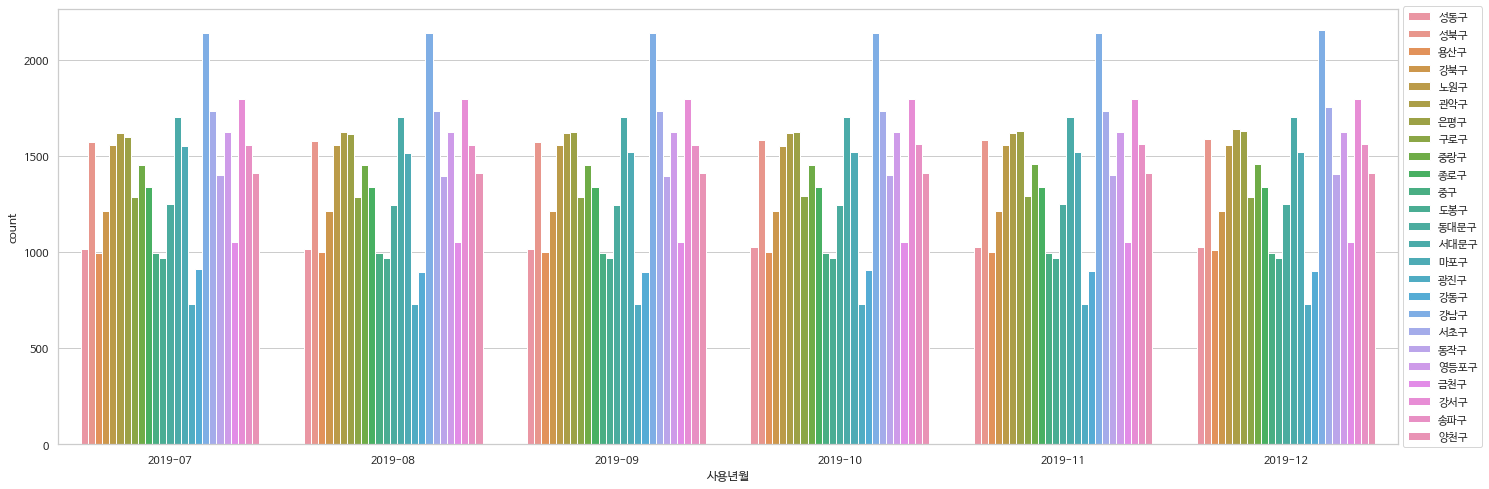

In [49]:
#2019년승차자 흐름 보기
# sns.set_style('whitegrid')
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.countplot(
    x='사용년월',
    hue='소속구',
    data=df_2019_fw.sort_values(['사용년월'])

)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#그래프 저장
plt.savefig('/content/data/2019하반기승차자_버스.png',dpi=100)
plt.show()

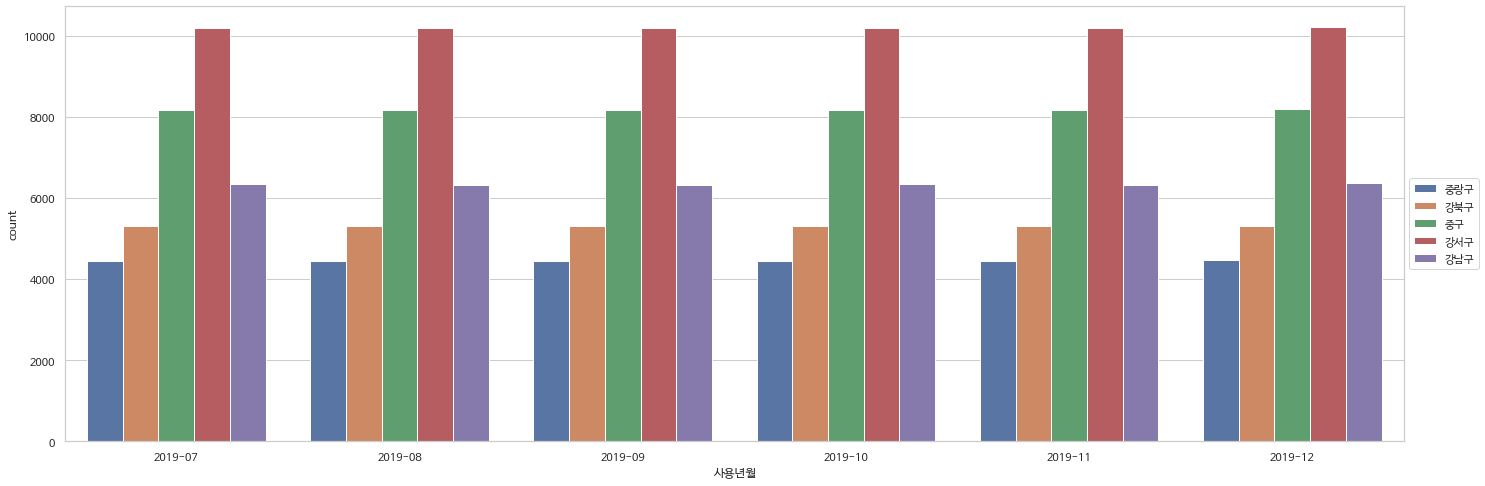

In [75]:
# 오구 나눈 2019보기
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.countplot(
    x='사용년월',
    hue='오구',
    data=df_2019_fw.sort_values(['사용년월'])

)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#그래프 저장
plt.savefig('/content/data/2019_하반기_오구_승차자_버스.png',dpi=100)
plt.show()

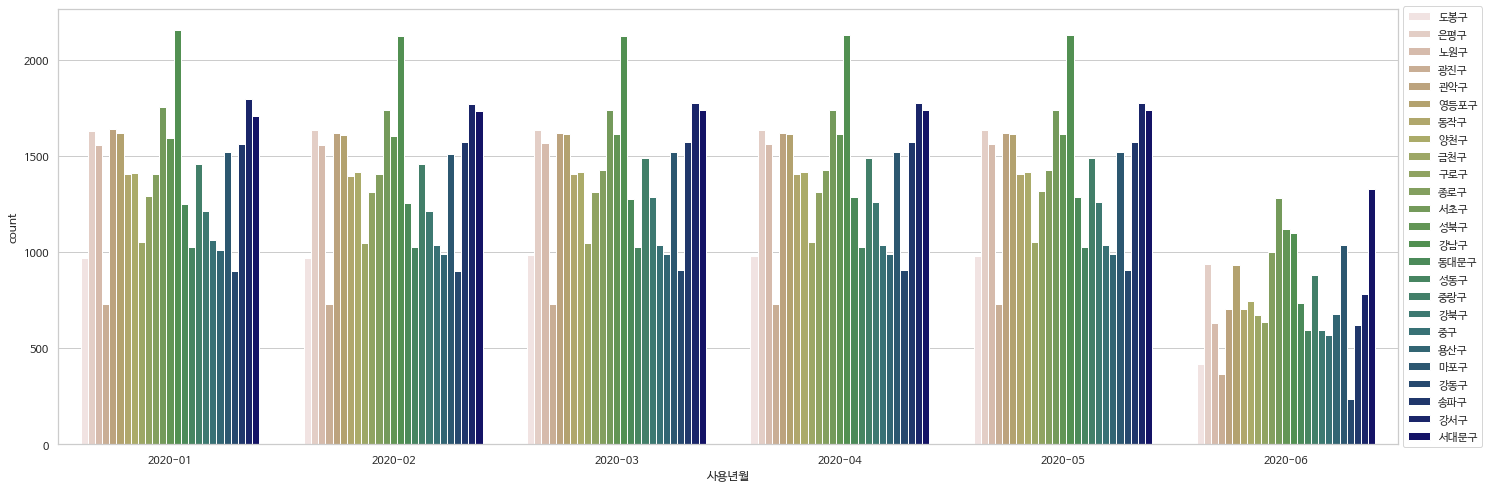

In [58]:
#2020년상반기승차자 흐름 보기
# sns.set_style('whitegrid')
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.countplot(
    x='사용년월',
    hue='소속구',
    # palette='coolwarm_r',
    palette='gist_earth_r',
    data=df_2020_ss.sort_values(['사용년월'])
)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#그래프 저장
plt.savefig('/content/data/2020상반기승차자_버스.png',dpi=100)
plt.show()

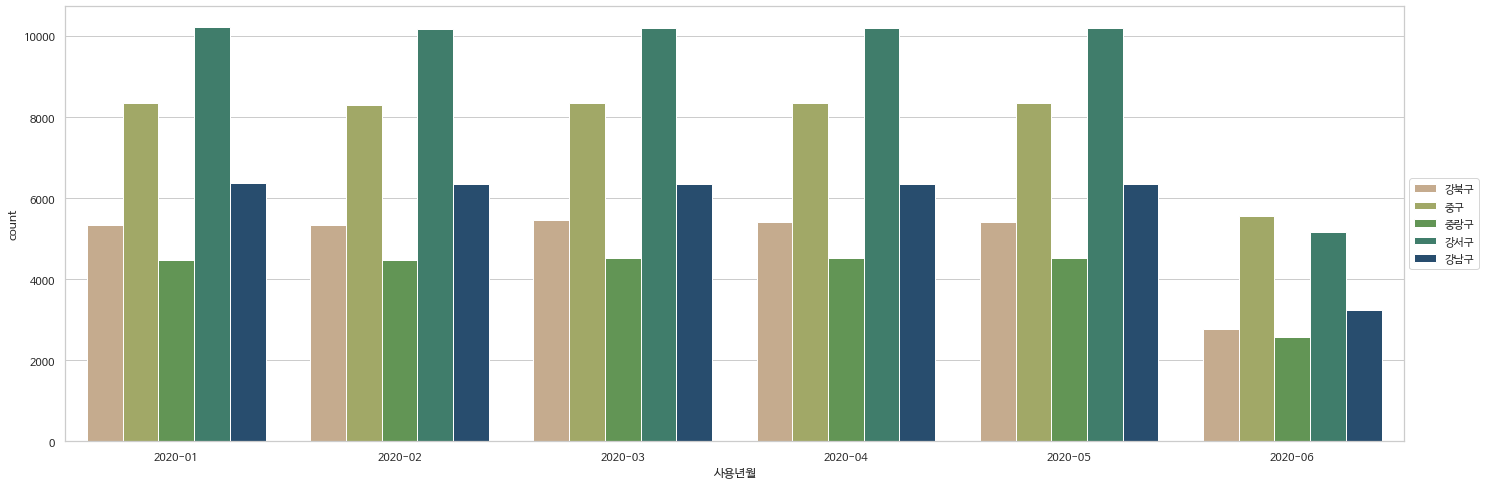

In [76]:
#오구별 2020년상반기승차자 흐름 보기
# sns.set_style('whitegrid')
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.countplot(
    x='사용년월',
    hue='오구',
    # palette='coolwarm_r',
    palette='gist_earth_r',
    data=df_2020_ss.sort_values(['사용년월'])
)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#그래프 저장
plt.savefig('/content/data/2020_상반기_오구승차자_버스.png',dpi=100)
plt.show()

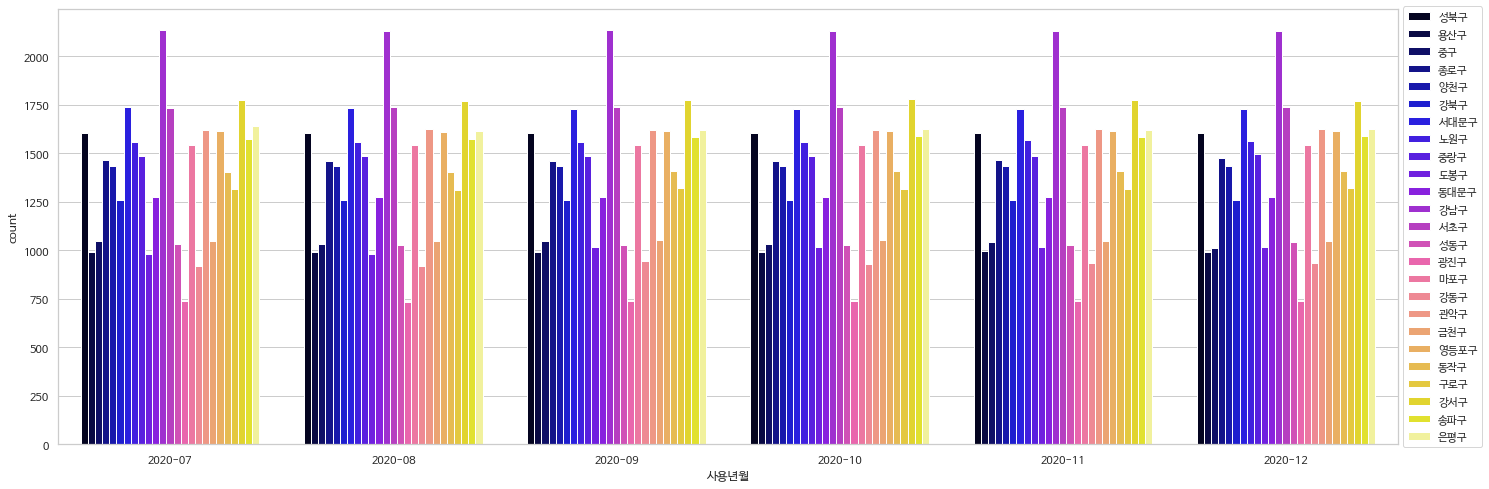

In [60]:
# sns.set_style('whitegrid')
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.countplot(
    x='사용년월',
    hue='소속구',
    palette='gnuplot2',
    data=df_2020_fw.sort_values(['사용년월'])
)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#그래프 저장
plt.savefig('/content/data/2020하반기승차자_버스.png',dpi=100)
plt.show()

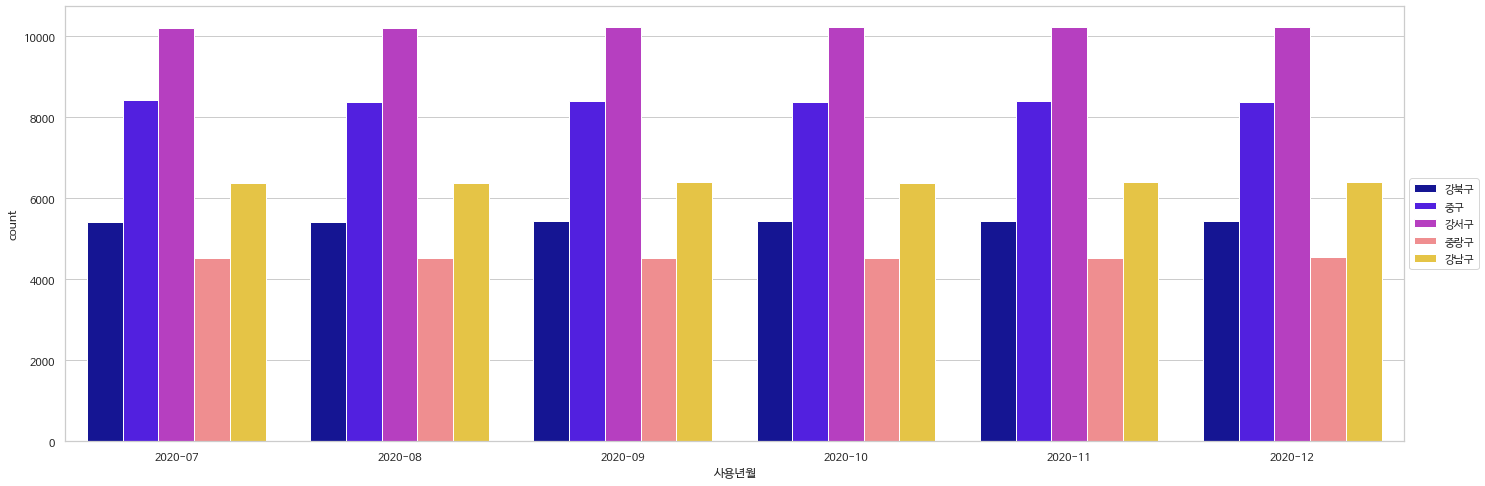

In [77]:
#오구별
# sns.set_style('whitegrid')
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.countplot(
    x='사용년월',
    hue='오구',
    palette='gnuplot2',
    data=df_2020_fw.sort_values(['사용년월'])
)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#그래프 저장
plt.savefig('/content/data/2020_하반기_오구승차자_버스.png',dpi=100)
plt.show()

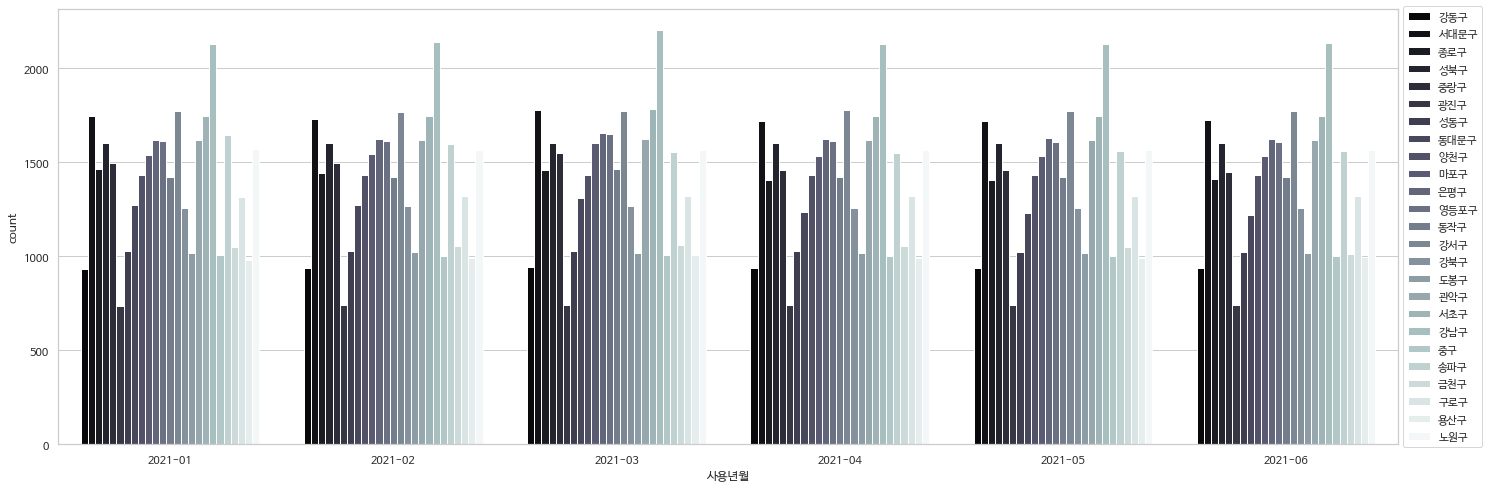

In [66]:
# sns.set_style('whitegrid')
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.countplot(
    x='사용년월',
    hue='소속구',
    palette='bone',
    data=df_2021.sort_values(['사용년월'])
)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#그래프 저장
plt.savefig('/content/data/2021승차자_버스.png',dpi=100)
plt.show()

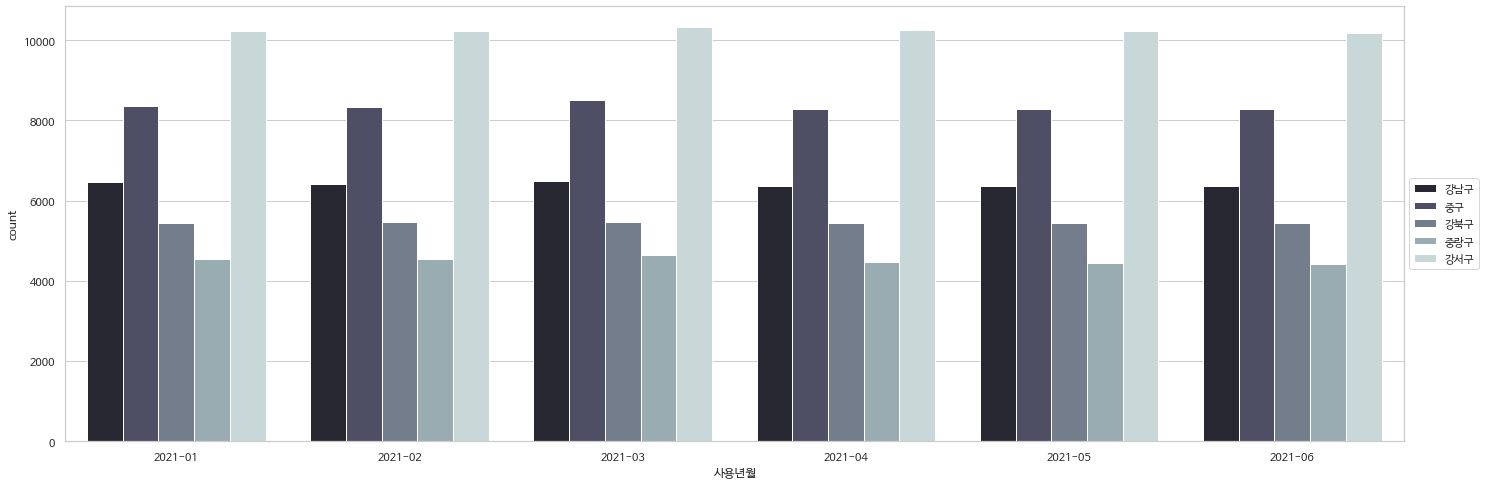

In [78]:
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.countplot(
    x='사용년월',
    hue='오구',
    palette='bone',
    data=df_2021.sort_values(['사용년월'])
)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#그래프 저장
plt.savefig('/content/data/2021_오구승차자_버스.png',dpi=100)
plt.show()